In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
df = pd.read_csv("../Web Scraper/compiled_report.csv")

##### Variables that will be provided by the user.

In [3]:
vaccine = 'BCG'
state = 'Haryana'
year = 2028

##### Finding the rows that need to be analyzed.

In [4]:
df = df[(df["VACCINE"]==vaccine) & (df["STATE"]==state)]

##### Creating a new dataframe for the provided parameters.

In [5]:
df = df.drop("STATE",axis = 1)
df = df.drop("VACCINE",axis = 1)
df.head(5)

,APPLICANTS,VACCINATED,YEAR
258,541000,403576,2008
259,541000,448919,2009
260,550000,432164,2010
261,532000,406322,2011
262,537000,402237,2012


In [6]:
x = df["YEAR"]
y = df["APPLICANTS"]
z = df["VACCINATED"]
inp = np.copy(x)
inp = inp.reshape(len(x),1)

In [7]:
output_cases = np.copy(y)
output_vaccinated = np.copy(z)

##### Defining the Linear Regression Models for the dataframe.

In [8]:
reg1 = LinearRegression().fit(inp, output_cases)#model for cases
reg2 = LinearRegression().fit(inp, output_vaccinated)#model for vaccinated

In [9]:
x=x.to_list()
y=y.to_list()
z=z.to_list()

##### Preciting the need that will arise in the following years

In [10]:
prediction_data = {}
last_year = x[-1]
for i in range (last_year+1,year+1):
    cases = int(np.trunc(reg1.predict([[i]])))
    prediction_data[i] = [cases]
    x.append(i)
    y.append(cases)

##### Predicting the years increase in vaccinations required to complete the goal.

In [11]:
yearly_increase = int((prediction_data[year][0]-z[-1])/(year-last_year))
itr = z[-1]
for i in range(last_year+1,year+1):
    itr += yearly_increase
    z.append(itr)
    prediction_data[i].append(itr)
prediction_data

{2020: [568758, 432768],
 2021: [571654, 452663],
 2022: [574550, 472558],
 2023: [577446, 492453],
 2024: [580343, 512348],
 2025: [583239, 532243],
 2026: [586135, 552138],
 2027: [589031, 572033],
 2028: [591928, 591928]}

##### Predicting the year we will react the goal at current speed.

In [12]:
meet = "Infinity"
for i in range(last_year+1,3000):
    curr_cases = int(np.trunc(reg1.predict([[i]]))) 
    curr_vacc = int(np.trunc(reg2.predict([[i]])))
    if(curr_vacc>=curr_cases):
        meet = i
print(f"Expected to meet at {meet}")

Expected to meet at Infinity


##### Plotting the graph for future predictions.

[Text(0.5, 1.0, 'Haryana report of BCG'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Cases every year')]

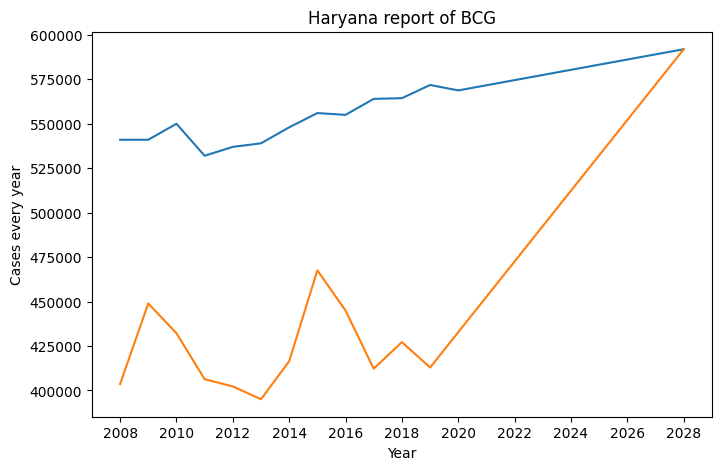

In [13]:
fig,ax = plt.subplots(figsize=(8,5))
x = np.array(x)
ax.plot(x,y)
ax.plot(x,z)

locator = ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

ax.set(title = f"{state} report of {vaccine}",xlabel = "Year",ylabel = "Cases every year")